## Mini-project task with linear regression in multidimensional input space and batch learning ##

Authors: Laura Nilsson & Leo Svanemar
Date: 2023-05-22



In [32]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


**Plot data & divide into test and training**

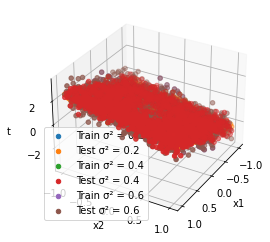

In [33]:
# x1 and x2 are limited to [-1, 1]x[-1, 1] with a step of 0.05
x1 = np.arange(-1, 1.05, 0.05)
x2 = np.arange(-1, 1.05, 0.05)
X1, X2 = np.meshgrid(x1, x2)

# assumed values of weight vector
w = [0, 1.5, -0.8]

# values of data noice, σ2 ∈ {0.2, 0.4, 0.6}
sigma_values_squared = [0.2, 0.4, 0.6]

# set seed for reproducibility, and 42 is the answer to everything :)
np.random.seed(42) 

# plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# divide into training data and test data
training_data = np.logical_or(np.abs(X1) <= 0.3, np.abs(X2) <= 0.3)
test_data = np.logical_or(np.abs(X1) > 0.3, np.abs(X2) > 0.3)

# train on the training data (obviously)
for sigma in sigma_values_squared:
    t = w[0] + w[1] * X1 + w[2] * X2 + np.random.normal(0, sigma, size=X1.shape)
    ax.scatter(X1[training_data], X2[training_data], t[training_data], label=f"Train σ² = {sigma}")
    ax.scatter(X1[test_data], X2[test_data], t[test_data], label=f"Test σ² = {sigma}")

# add labels and legend
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('t')
ax.legend()

# change the view angle
ax.view_init(elev=30, azim=30)

plt.show()


### 2.3

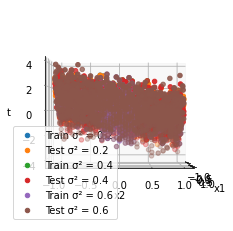

MSE (σ² = 0.2) = 0.1971901417530678
MSE (σ² = 0.4) = 0.4491506427837673
MSE (σ² = 0.6) = 0.556552760694397


In [34]:
import numpy as np
import matplotlib.pyplot as plt

# x1 and x2 are limited to [-1, 1]x[-1, 1] with a step of 0.05
x1 = np.arange(-1, 1.05, 0.05)
x2 = np.arange(-1, 1.05, 0.05)
X1, X2 = np.meshgrid(x1, x2)

# assumed values of weight vector
w = [0, 1.5, -0.8]

# values of data noise, σ² ∈ {0.2, 0.4, 0.6}
sigma_values_squared = [0.2, 0.4, 0.6]

# set seed for reproducibility
np.random.seed(42) 

# plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# divide into training data and test data
training_data = np.logical_or(np.abs(X1) <= 0.3, np.abs(X2) <= 0.3)
test_data = np.logical_or(np.abs(X1) > 0.3, np.abs(X2) > 0.3)

# train on the training data
for sigma_squared in sigma_values_squared:
    # Generate the target values with Gaussian noise
    t = w[0] + w[1] * X1 + w[2] * X2 + np.random.normal(0, np.sqrt(sigma_squared), size=X1.shape)
    
    ax.scatter(X1[training_data], X2[training_data], t[training_data], label=f"Train σ² = {sigma_squared}")
    ax.scatter(X1[test_data], X2[test_data], t[test_data], label=f"Test σ² = {sigma_squared}")

# add labels and legend
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('t')
ax.legend()

# change the view angle
ax.view_init(elev=0, azim=0)

plt.show()

# Fit the model using maximum likelihood principle and calculate MSE on test data
mse_values = []
for sigma_squared in sigma_values_squared:
    # Generate the target values with Gaussian noise
    t = w[0] + w[1] * X1 + w[2] * X2 + np.random.normal(0, np.sqrt(sigma_squared), size=X1.shape)

    # Create boolean indices for training and test data
    train_indices = np.logical_or(np.abs(X1) <= 0.3, np.abs(X2) <= 0.3)
    test_indices = np.logical_or(np.abs(X1) > 0.3, np.abs(X2) > 0.3)

    # Calculate the target values for training and test data
    train_targets = t[train_indices].flatten()
    test_targets = t[test_indices].flatten()

    # Fit the model using maximum likelihood on the training data
    X_train = np.column_stack((np.ones_like(X1[train_indices]), X1[train_indices], X2[train_indices]))
    w_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ train_targets

    # Predict the test data using the estimated weights
    X_test = np.column_stack((np.ones_like(X1[test_indices]), X1[test_indices], X2[test_indices]))
    test_predictions = X_test @ w_hat
    
    # Calculate the mean squared error (MSE) on the test data
    mse = np.mean((test_predictions - test_targets) ** 2)
    mse_values.append(mse)
    
for i, sigma_squared in enumerate(sigma_values_squared):
    print(f"MSE (σ² = {sigma_squared}) = {mse_values[i]}")




### 2.4

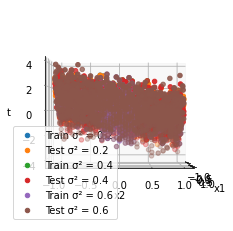

[0.10573036 0.16472831 0.2618926  ... 0.23847329 0.02213699 1.24973784]
[0.02487865 0.3588964  0.08956747 ... 0.04519961 0.02089555 0.28530724]
[1.21604176 0.76564201 0.64511654 ... 0.55310393 0.09819068 0.0159867 ]
[0.35122    0.72461176 0.26262581 ... 0.00463907 0.19164021 0.01875782]
[4.66382632e-01 3.72877967e-04 4.99563048e-01 ... 7.51450458e-01
 2.13454931e-01 3.09938227e-01]
[0.0026363  0.30590123 0.23211263 ... 0.07992748 0.02767051 0.02733989]
[1.23449487 0.07029252 0.62759993 ... 0.8519122  0.44034481 1.38601766]
[0.00344447 0.70187634 0.13125615 ... 0.00397751 0.09395151 1.23134865]
[8.18104590e-05 1.53894762e-03 9.92399900e-01 ... 3.84400790e-03
 3.93645090e-02 1.85962475e+00]


In [35]:
import numpy as np
import matplotlib.pyplot as plt

# x1 and x2 are limited to [-1, 1]x[-1, 1] with a step of 0.05
x1 = np.arange(-1, 1.05, 0.05)
x2 = np.arange(-1, 1.05, 0.05)
X1, X2 = np.meshgrid(x1, x2)

# assumed values of weight vector
w = [0, 1.5, -0.8]

# values of data noise, σ² ∈ {0.2, 0.4, 0.6}
sigma_values_squared = [0.2, 0.4, 0.6]

# gaussian prior distribution
prior_mean = np.zeros(X_train.shape[1])  # Prior mean is zero
alpha_values = [0.7, 1.5, 3.0]  # Values of the uncertainty parameter

# set seed for reproducibility
np.random.seed(42) 

# plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# divide into training data and test data
training_data = np.logical_or(np.abs(X1) <= 0.3, np.abs(X2) <= 0.3)
test_data = np.logical_or(np.abs(X1) > 0.3, np.abs(X2) > 0.3)

# train on the training data
for sigma_squared in sigma_values_squared:
    # Generate the target values with Gaussian noise
    t = w[0] + w[1] * X1 + w[2] * X2 + np.random.normal(0, np.sqrt(sigma_squared), size=X1.shape)
    
    ax.scatter(X1[training_data], X2[training_data], t[training_data], label=f"Train σ² = {sigma_squared}")
    ax.scatter(X1[test_data], X2[test_data], t[test_data], label=f"Test σ² = {sigma_squared}")

# add labels and legend
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('t')
ax.legend()

# change the view angle
ax.view_init(elev=0, azim=0)

plt.show()

# Fit the model using maximum likelihood principle and calculate MSE on test data
mse_values = []
for sigma_squared in sigma_values_squared:
    #print(f"σ² = {sigma_squared}")
    for alpha in alpha_values:
        #print(f"α = {alpha}")
        # Generate the target values with Gaussian noise
        t = w[0] + w[1] * X1 + w[2] * X2 + np.random.normal(0, np.sqrt(sigma_squared), size=X1.shape)

        # Create boolean indices for training and test data
        train_indices = np.logical_or(np.abs(X1) <= 0.3, np.abs(X2) <= 0.3)
        test_indices = np.logical_or(np.abs(X1) > 0.3, np.abs(X2) > 0.3)

        # Calculate the target values for training and test data
        train_targets = t[train_indices].flatten()
        test_targets = t[test_indices].flatten()

        # Fit the model using maximum likelihood on the training data
        X_train = np.column_stack((np.ones_like(X1[train_indices]), X1[train_indices], X2[train_indices]))
        w_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ train_targets
        
        # calculate the posterior distribution w/ Bayesian interference
        posterior_precision = np.eye(X_train.shape[1]) * alpha + X_train.T @ X_train / sigma_squared
        posterior_covariance = np.linalg.inv(posterior_precision)
        posterior_mean = posterior_covariance @ (X_train.T @ train_targets) / sigma_squared


        # Predict the test data using the estimated weights
        X_test = np.column_stack((np.ones_like(X1[test_indices]), X1[test_indices], X2[test_indices]))
        test_predictions = X_test @ posterior_mean
        
        # Calculate the mean squared error (MSE) on the test data
        #print((test_predictions - test_targets) ** 2)
        mse = np.mean((test_predictions - test_targets) ** 2)
        mse_values.append(mse)
        print(f"MSE (σ² = {sigma_squared}, α = {alpha}) = {mse}")
    
#for i, sigma_squared in enumerate(sigma_values_squared):
#    print(f"MSE (σ² = {sigma_squared}) = {mse_values[i]}")


### 2.5

A comparsion between the freques